# Requirements

In [ ]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years.These system help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006. Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists. For more details visit https://archive.ics.uci.edu/dataset/161/mammographic+mass.

## The Mammographic Mass Dataset

## Downloading the Mammographic Mass Dataset

In [ ]:
!gdown 1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R
To: /content/mammographic-mass.csv
100% 13.3k/13.3k [00:00<00:00, 33.9MB/s]


## Exploring the Mammographic Mass Dataset
The Mammographic Mass dataset contains six attributes, among which there is a target attribute and a non-predictive attribute. The target attribute, denoted as 'Severity', is binomial, distinguishing between benign (0) and malignant (1) cases. The non-predictive attribute, 'BI-RADS assessment', is an ordinal scale ranging from 1 to 5. The remaining four attributes are predictive, including 'Age', represented in years as an integer, 'Shape' categorizing mass shape as round (1), oval (2), lobular (3), or irregular (4). 'Margin' classifies mass margins into circumscribed (1), microlobulated (2), obscured (3), ill-defined (4), or spiculated (5). 'Density' indicates mass density as high (1), iso (2), low (3), or fat-containing (4).

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
df=pd.read_csv('/content/mammographic-mass.csv')
df

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


Drop the column `BI-RADS assessment` as it shouldn't be used for prediction.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.impute import SimpleImputer

df_copy=df.copy()
df_copy.iloc[:,:]
df_copy.dropna(subset=['BI-RADS assessment'], how='all', inplace=True)
df_copy

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


Explore the dataset using visualizations of your choice.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS assessment  959 non-null    float64
 1   Age                 954 non-null    float64
 2   Shape               929 non-null    float64
 3   Margin              912 non-null    float64
 4   Density             883 non-null    float64
 5   Severity            959 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 52.4 KB


array([[<Axes: title={'center': 'BI-RADS assessment'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Shape'}>,
        <Axes: title={'center': 'Margin'}>],
       [<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'Severity'}>]], dtype=object)

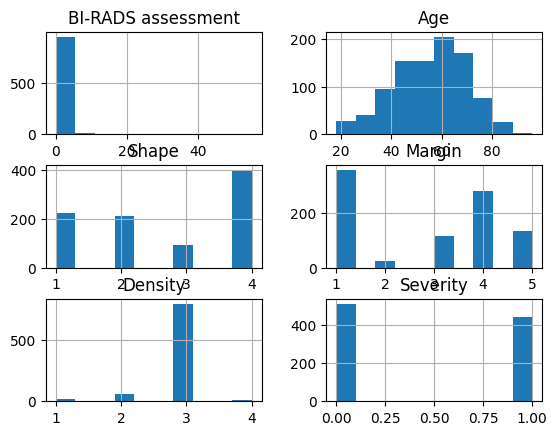

In [ ]:
# Write your code here. Add as many boxes as you need.
df_copy.info()
df_copy.hist()

Check if the dataset is balanced.

<Axes: >

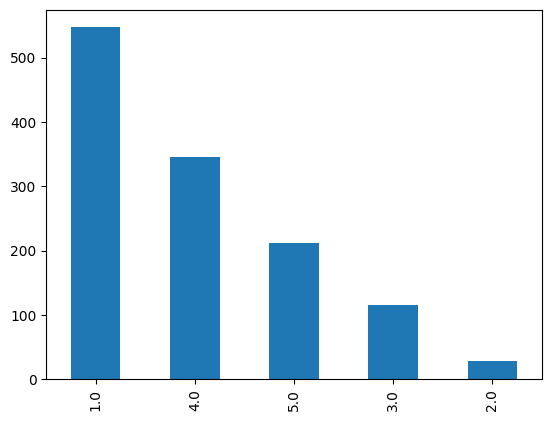

In [ ]:
# Write your code here. Add as many boxes as you need.

df_copy['BI-RADS assessment'].value_counts()

df_copy['Age'].value_counts()

df_copy['Shape'].value_counts()

df_copy['Margin'].value_counts()
df_copy['BI-RADS assessment'].value_counts().plot.bar()
df_copy['Age'].value_counts().plot.bar()
df_copy['Shape'].value_counts().plot.bar()
df_copy['Margin'].value_counts().plot.bar()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
# Write your code here. Add as many boxes as you need.

perc_isnull=df_copy.isnull().sum() / len(df) * 100
perc_isnull

BI-RADS assessment    0.000000
Age                   0.520291
Shape                 3.121748
Margin                4.890739
Density               7.908429
Severity              0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

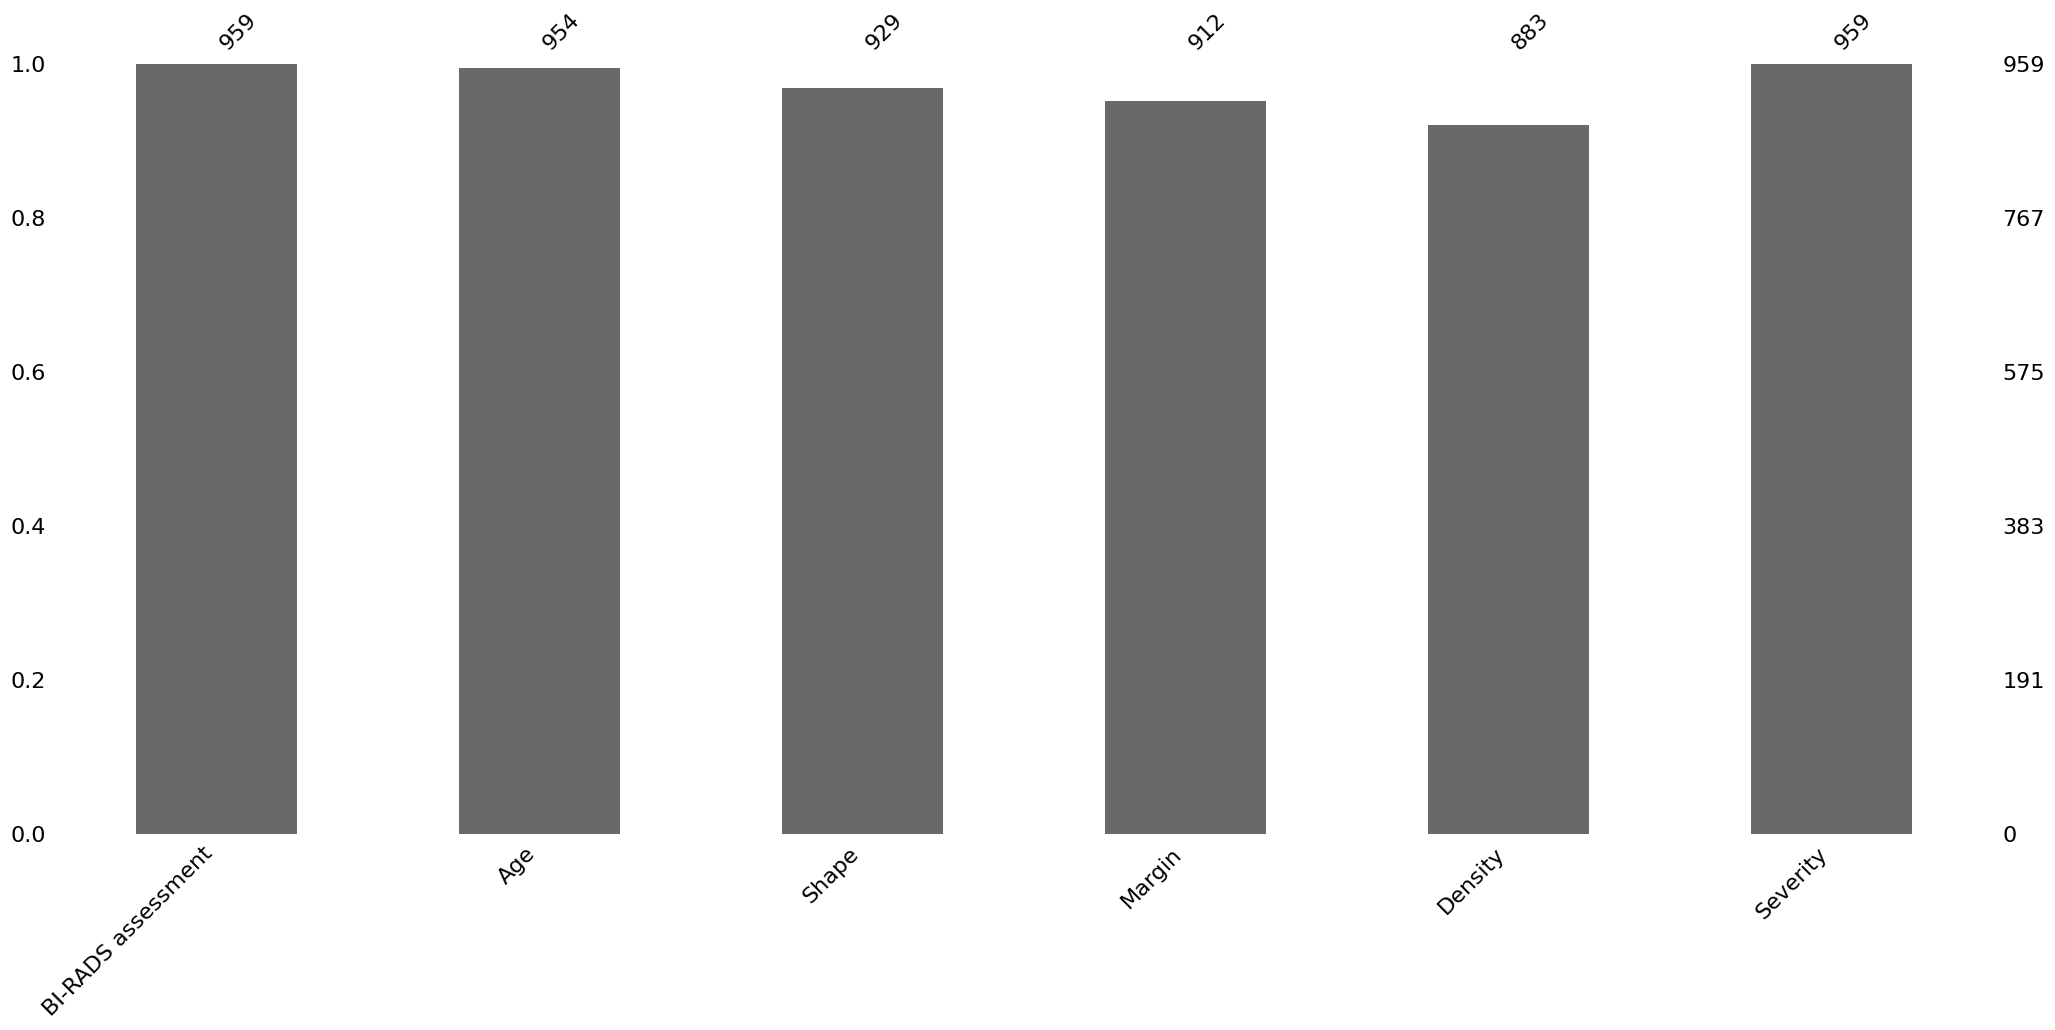

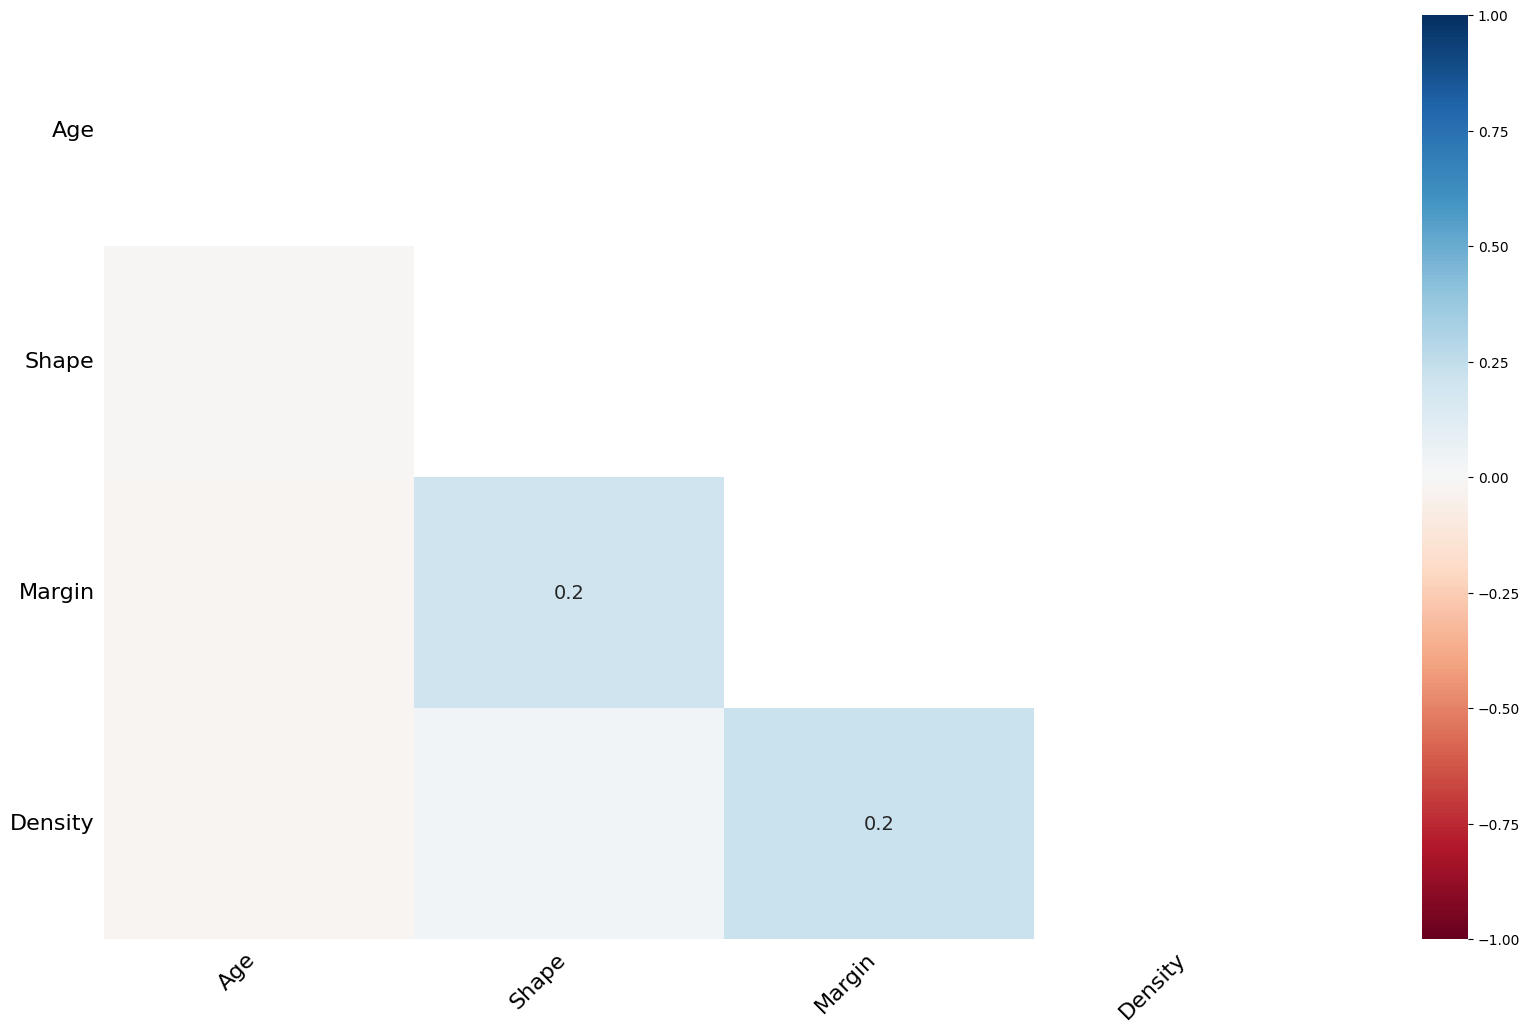

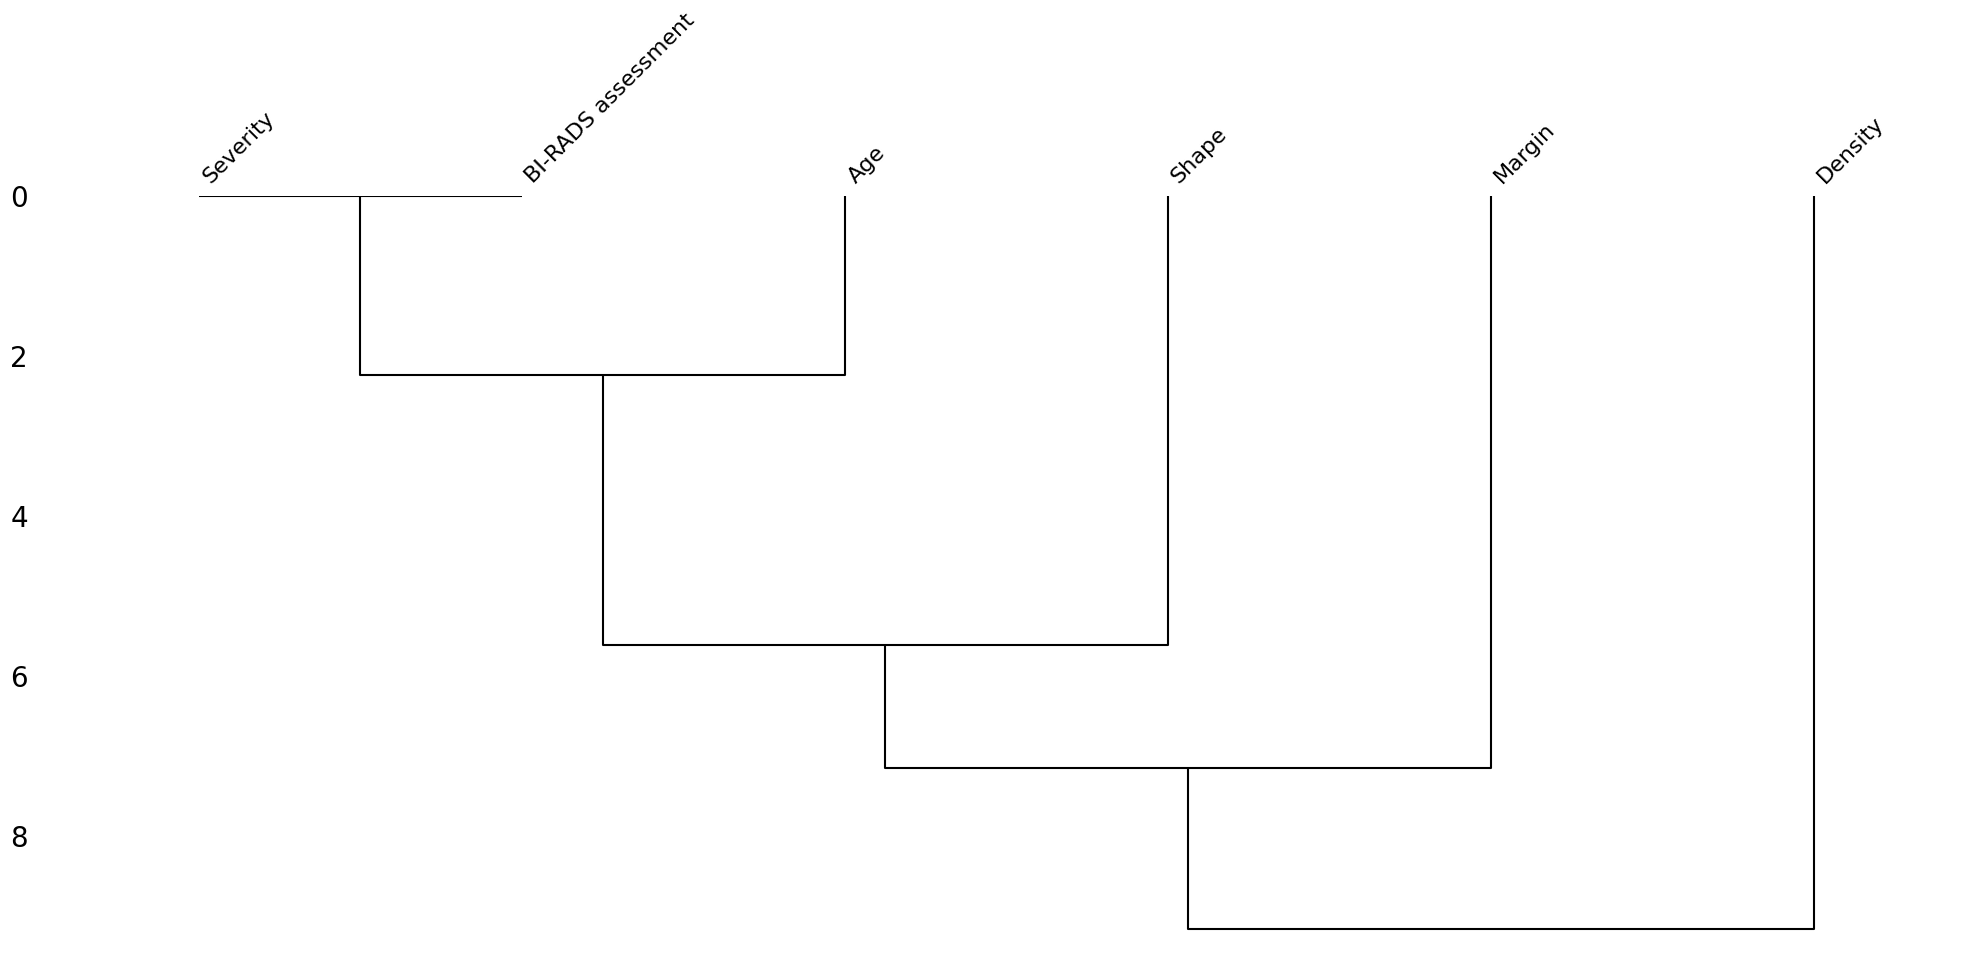

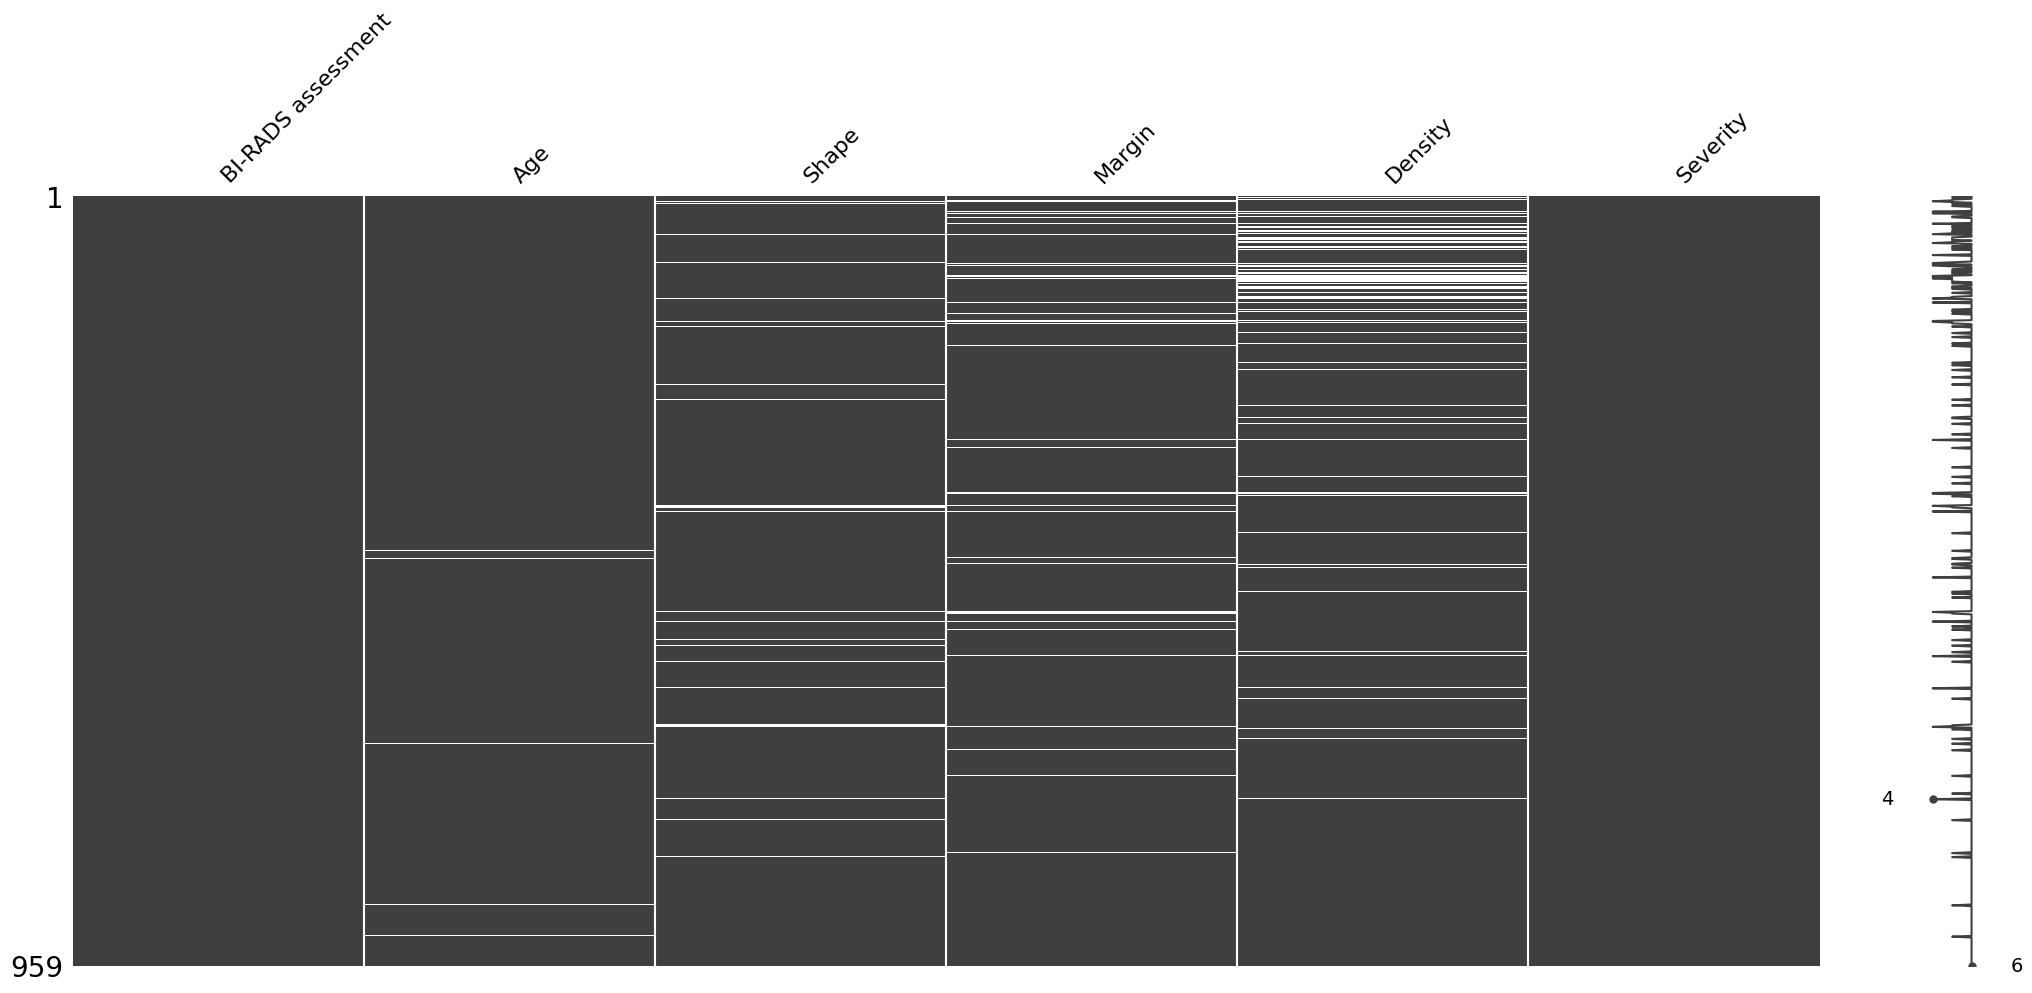

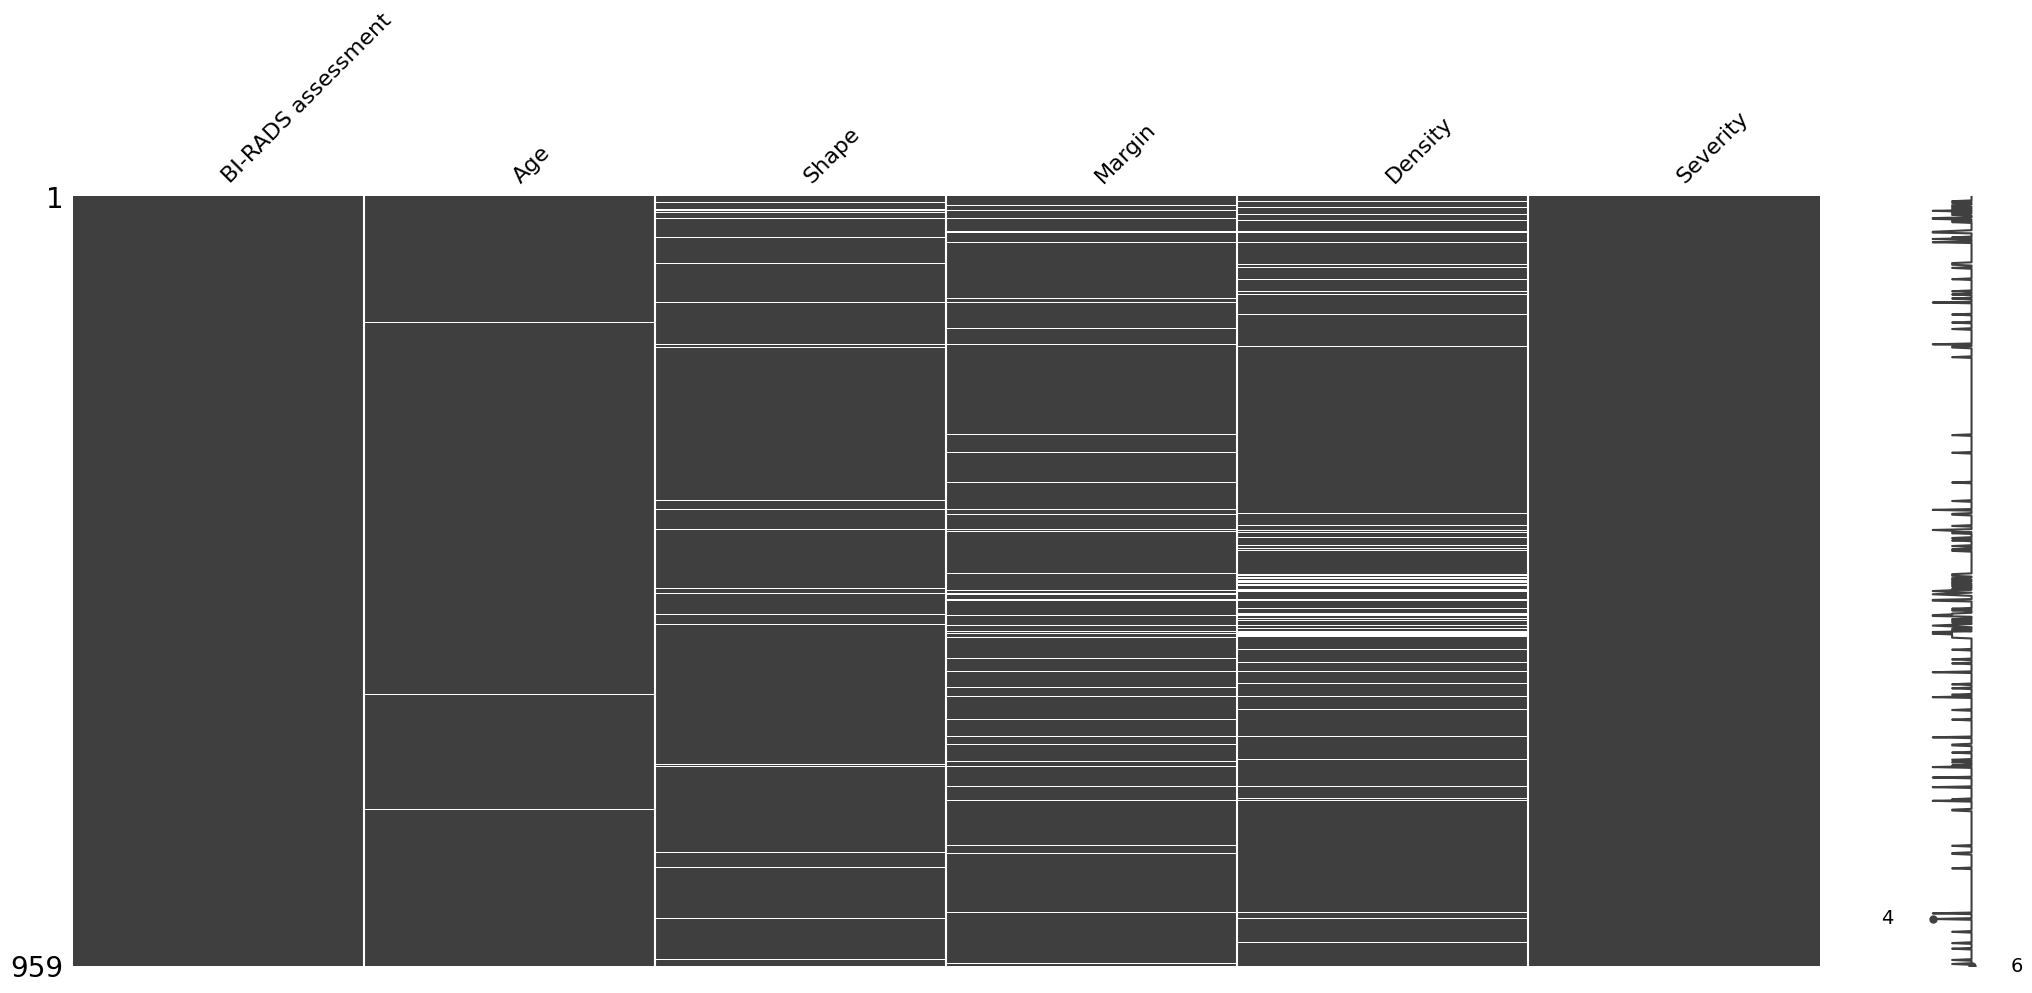

In [ ]:
# Write your code here. Add as many boxes as you need.
import missingno as msngo
msngo.bar(df_copy)
msngo.heatmap(df_copy)
msngo.dendrogram(df_copy)
msngo.matrix(df_copy)
msngo.matrix(df_copy.sort_values('BI-RADS assessment'))

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.
#add your code
from sklearn.impute import SimpleImputer
df_copy.iloc[:,:]
imp=SimpleImputer(strategy='most_frequent', fill_value=0)
df_copy.iloc[:,:]=imp.fit_transform(df_copy)
df_copy.isnull().sum()

BI-RADS assessment    0
Age                   0
Shape                 0
Margin                0
Density               0
Severity              0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_copy.iloc[:,:-1], df_copy['Severity'], test_size=0.2)
X_train
Y_train

45     1.0
300    1.0
601    1.0
785    1.0
242    0.0
      ... 
542    0.0
323    1.0
720    0.0
471    1.0
371    0.0
Name: Severity, Length: 767, dtype: float64

## Feature Scaling
Standardize the features using `StandardScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.neighbors import KNeighborsClassifier
cl=KNeighborsClassifier(n_neighbors=5)
cl.fit(X_train, Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_predict = cl.predict(X_test)
y_predict

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0.])

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import classification_report, confusion_matrix, f1_score
confusion_matrix(Y_test, y_predict)
print(classification_report(Y_test, y_predict))
f1_score(Y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       108
         1.0       0.73      0.71      0.72        84

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



0.7228915662650603

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a validation set. This involves experimenting with various values for `n_neighbors` and evaluating the model's performance on a validation set. Subsequently, you're required to generate a line plot illustrating how the F1 score of the model predictions changes with different `n_neighbors` values. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

## Dataset Splitting
To achieve the required split of the dataset into three sets (train set, validation set, and test set) in a ratio of 70:10:20, you can follow these steps:

- Start by splitting the dataset into a ratio of 80:20 to create the initial train and test sets.
- Subsequently, divide the initial train set further into a ratio of 87.5:12.5 to generate the final train and validation sets.

This process can be accomplished using appropriate functions from libraries such as `scikit-learn` or manually.

In [ ]:
# Write your code here. Add as many boxes as you need.
X_bonus_train, X_bonus_test, Y_bonus_train, Y_bonus_test = train_test_split(df_copy.iloc[:,:-1], df_copy['Severity'], test_size=0.2)
X_bonus_train, X_bonus_test, V_bonus_train, V_bonus_test = train_test_split(df_copy.iloc[:,:-1], df_copy['Severity'], test_size=0.125)
X_bonus_train
V_bonus_train
Y_bonus_train

703    1.0
465    0.0
236    0.0
443    1.0
671    1.0
      ... 
175    1.0
893    0.0
16     0.0
299    1.0
764    0.0
Name: Severity, Length: 767, dtype: float64

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance on the validation set.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import classification_report, confusion_matrix, f1_score
list_check=list()
cl=KNeighborsClassifier(n_neighbors=1)
cl.fit(X_bonus_train, V_bonus_train)
v_predict = cl.predict(X_bonus_test)
v_predict
max=f1_score(V_bonus_test, v_predict)
for i in range(10):
  if i==0:
    continue
  cl=KNeighborsClassifier(n_neighbors=i)
  cl.fit(X_bonus_train, V_bonus_train)
  v_predict = cl.predict(X_bonus_test)
  v_predict
  if f1_score(V_bonus_test, v_predict)>max:
    max=f1_score(V_bonus_test, v_predict)
    place=i
place

3

## Dependence of the Model Performance on the KNN Hyperparameter
Generate a line plot illustrating how the F1 score of the model predictions changes with different `n_neighbors` values.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.
cl=KNeighborsClassifier(n_neighbors=place)
cl.fit(V_bonus_train, Y_bonus_train)
y_predict = cl.predict(V_bonus_test)
y_predict
confusion_matrix(Y_bonus_test, y_predict)
print(classification_report(Y_bonus_test, y_predict))
f1_score(Y_bonus_test, y_predict)


ValueError: ignored